# cylinder model

## 1D example

import all the packages

In [10]:
import numpy as np

# import sasmodels
import sasmodels
import sasmodels.core
import sasmodels.data
import sasmodels.bumps_model

import sasdata
from sasdata.dataloader.loader import Loader

from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data, empty_data1D, plot_data

import bumps
import bumps.fitters
import bumps.names
import bumps.fitproblem


import os
#import periodictable
#import periodictable.nsf
import tol_colors as tc # colorblind safe color palettes


"""
import matplotlib.pyplot and set custom default settings for plots
"""
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

plt.rc('font', size=14) # default fontsize
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('legend', title_fontsize=14)
plt.rc('figure', titlesize=18)
plt.rc("figure", figsize=(5,5))
plt.rc("lines", linewidth=3)


# use colorblind safe colors:
plt.rc('axes', prop_cycle=plt.cycler('color', list(tc.tol_cset('muted'))))
try:
    plt.cm.register_cmap('tc_iridescent', tc.tol_cmap('iridescent'))
except:
    pass
plt.rc('image', cmap='tc_iridescent')

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_3192\1856067786.py:33: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_3192\1856067786.py:50: UserWarning: Trying to register the cmap 'tc_iridescent' which already exists.
  plt.cm.register_cmap('tc_iridescent', tc.tol_cmap('iridescent'))


example of checking the version of a package

In [11]:
sasdata.__version__

'0.9.0'

Load a 1D example data file

* load the data from an example .dat file into a numpy array
* transform the numpy array into a suitable 1D data set using `sasmodels.data.Data1D`

In [12]:
filename='./data-exemples/e6_10mM.dat'
data_np = np.loadtxt(filename, skiprows=40)

data = sasmodels.data.Data1D(x=data_np[:,0], y=data_np[:,1], dy=data_np[:,2])

In [13]:
data_np.shape

(1201, 3)

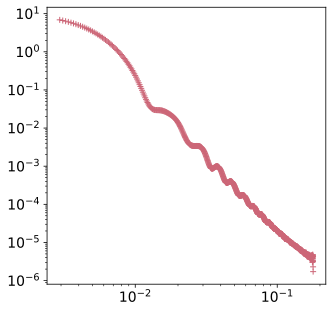

In [14]:
plt.loglog(data_np[:,0], data_np[:,1], '+')

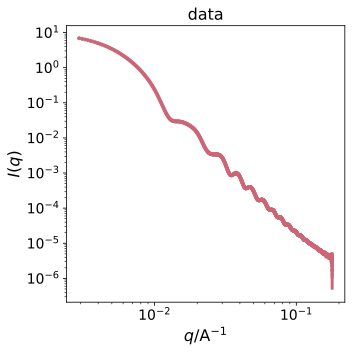

In [15]:
sasmodels.data.plot_data(data)

* create the computation `kernel` selecting the `cylinder` model
* create the `model` interfaced with bump module
* create the `experiment`, containing both data and model

In [16]:
kernel = sasmodels.core.load_model("cylinder")
params = {} # default parameters for now
model = sasmodels.bumps_model.Model(kernel, **params)
experiment = sasmodels.bumps_model.Experiment(data=data, model=model)

Check the kernel and its different parameters

default values of all parameters

In [17]:
kernel.info.parameters.defaults

{'scale': 1,
 'background': 0.001,
 'sld': 4,
 'sld_solvent': 1,
 'radius': 20,
 'length': 400,
 'theta': 60,
 'phi': 60,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0}

read different elements

In [18]:
kernel.info.parameters.iq_parameters

[P<sld>, P<sld_solvent>, P<radius>, P<length>]

In [19]:
kernel.info.name

'cylinder'

In [20]:
kernel.info.category

'shape:cylinder'

parameters with polydispersity for 1D data

In [21]:
kernel.info.parameters.pd_1d

{'length', 'radius'}

parameters with polydispersity for 2D data

In [22]:
kernel.info.parameters.pd_2d

{'length', 'phi', 'radius', 'theta'}

parameters for orientation

In [23]:
kernel.info.parameters.orientation_parameters

[P<theta>, P<phi>]

* plot the `experiment` with the default values

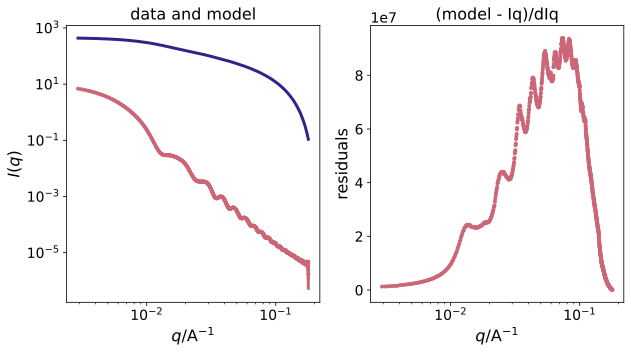

In [24]:
plt.figure(figsize=(10,5))
experiment.plot()

 ### TO DO: look later at function sasmodels.data.plot_theory()

* use a dictionary `params` to enter values of the parameters
* create the `model` interfaced with bump module
* create the `experiment`, containing both data and model

plot the experiment with manually ajusted values for the parameters

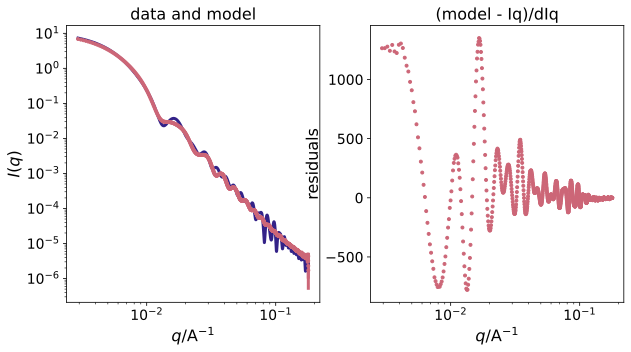

In [25]:
params = {
    "radius": 300,
    "radius_pd_type": 'gaussian', #type of polydispersity function
    "radius_pd": 0.1, #polydispersity
    "radius_pd_n": 8, #number of steps in polydispersity
    "radius_pd_nsigma": 4, #number of steps in polydispersity
     "length":1000,
    "background": 0.000001,
    "scale": 0.00004
}
model = sasmodels.bumps_model.Model(model=kernel, **params)
experiment = sasmodels.bumps_model.Experiment(data=data, model=model)

plt.figure(figsize=(10,5))
experiment.plot()

## Explanation of the polydispersity parameters

The polydispersity is set using a special set of \*\_pd\_\* parameters:
* `*_pd*` is the width of the polydispersity and the exact definition will depend on the type of distribution specified; in this cause of a 'gaussian` distribution, it is defined as as $\frac{\sigma}{x_{mean}}$
* `*_pd_type*` defines the type of polydispersity distribution used
* `*_pd_n` corresponds to the the number of points in the distribution used by the calculation (Npts in the image below)
* `*_pd_nsigma` sets the range of the distribution sampled (Nsigmas in the image below)

For example, radius polydispersity could be defined by specifying **all four** of the pd parameters. With the default values, this would look like:
* `radius_pd = 0`
* `radius_pd_type = 'gaussian'`
* `radius_pd_n = 35`
* `radius_pd_nsigma = 3`

The available polydispersity distributions are defined in the SasView [documentation](https://www.sasview.org/docs/user/qtgui/Perspectives/Fitting/pd/polydispersity.html) but we can access them directly through the sasmodels `weights` module.

The 'gaussian' distribution is claculed by:

$$
f(x) = \frac{1}{Norm}\exp\left(-\frac{(x-x_{mean})^2}{2\sigma^2}\right)
$$

<img src=https://www.sasview.org/docs/_images/pd_gaussian.jpg>

*Image source: https://www.sasview.org/docs/user/qtgui/Perspectives/Fitting/pd/polydispersity.html*


* choice of the initial values for parameters
* choice of the fiting parameters with their fiting range

In [26]:
params = {
    "radius": 300,
    "radius_pd_type": 'gaussian', #number of steps in polydispersity
    "radius_pd": 0.1, #polydispersity
    "radius_pd_n": 8, #number of steps in polydispersity
    "radius_pd_nsigma": 4, #number of steps in polydispersity
     "length":1000,
    "background": 0.000001,
    "scale": 0.00004
}

model = sasmodels.bumps_model.Model(model=kernel, **params)

#list of the fiting parameters with their fiting range
model.scale.range(0.00002, 0.00006)
model.radius.range(200, 400)

experiment = sasmodels.bumps_model.Experiment(data=data, model=model)

* creation of the fit `problem` 
* `problem` is generated by FitProblem in bump module

In [27]:
problem = bumps.fitproblem.FitProblem(experiment)

* RUN the fit `problem` 

step 1 cost 61293.0567(19)
                                  radius ....|.....        300 in (200,400)
                                   scale ....|.....      4e-05 in (2e-05,6e-05)
step 7 cost 40590.9971(19)
step 13 cost 38513.1018(19)
step 19 cost 38469.9245(19)
step 25 cost 38468.1852(19)
step 31 cost 38468.1686(19)
step 36 cost 38468.1671(19)
step 42 cost 38468.1671(19)
step 47 cost 38468.1671(19)
step 53 cost 38468.1671(19)
step 59 cost 38468.1671(19)
final chisq 38468.1671(19)
=== Uncertainty from curvature:     name   value(unc.) ===
                                  radius   294.0172(15)   
                                   scale   39.08563(33)e-6


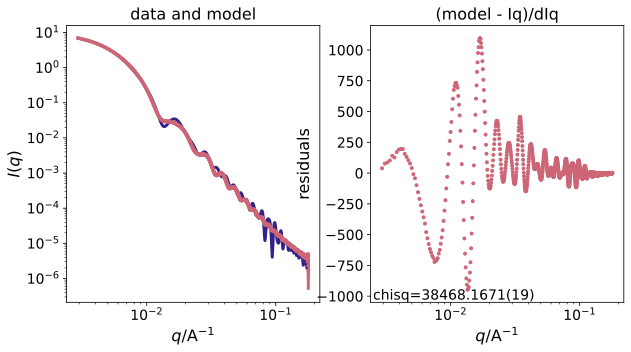

In [28]:
results = bumps.fitters.fit(problem, verbose=True)
plt.figure(figsize=(10, 5))
problem.plot()

The current value of all parameters can always be called using `model.state()`:

In [29]:
model.state()

{'scale': 3.908563317768954e-05,
 'background': 1e-06,
 'sld': 4,
 'sld_solvent': 1,
 'radius': 294.0171999616126,
 'radius_pd': 0.1,
 'radius_pd_n': 8,
 'radius_pd_nsigma': 4,
 'length': 1000,
 'length_pd': 0.0,
 'length_pd_n': 35.0,
 'length_pd_nsigma': 3.0,
 'theta': 60,
 'theta_pd': 0.0,
 'theta_pd_n': 35.0,
 'theta_pd_nsigma': 3.0,
 'phi': 60,
 'phi_pd': 0.0,
 'phi_pd_n': 35.0,
 'phi_pd_nsigma': 3.0,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0,
 'radius_pd_type': 'gaussian',
 'length_pd_type': 'gaussian',
 'theta_pd_type': 'gaussian',
 'phi_pd_type': 'gaussian'}

In [30]:
print(problem.summarize())

                                  radius ....|.....    294.017 in (200,400)
                                   scale ....|..... 3.90856e-05 in (2e-05,6e-05)


In [31]:
results.x

array([2.94017200e+02, 3.90856332e-05])

In [32]:
results.dx

array([1.47722990e-03, 3.34541135e-10])

In [33]:
problem.labels()

['radius', 'scale']

In [34]:
problem.fitness.model.state()

{'scale': 3.908563317768954e-05,
 'background': 1e-06,
 'sld': 4,
 'sld_solvent': 1,
 'radius': 294.0171999616126,
 'radius_pd': 0.1,
 'radius_pd_n': 8,
 'radius_pd_nsigma': 4,
 'length': 1000,
 'length_pd': 0.0,
 'length_pd_n': 35.0,
 'length_pd_nsigma': 3.0,
 'theta': 60,
 'theta_pd': 0.0,
 'theta_pd_n': 35.0,
 'theta_pd_nsigma': 3.0,
 'phi': 60,
 'phi_pd': 0.0,
 'phi_pd_n': 35.0,
 'phi_pd_nsigma': 3.0,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0,
 'radius_pd_type': 'gaussian',
 'length_pd_type': 'gaussian',
 'theta_pd_type': 'gaussian',
 'phi_pd_type': 'gaussian'}

In [35]:
problem.fitness.theory()

array([6.89499751e+00, 6.63597172e+00, 6.37499901e+00, ...,
       4.44432551e-06, 4.48124108e-06, 4.50100776e-06])

The default optimizer for the bumps fit is the Levenberg-Marquardt method, but there are many available as described in greater detail in the Bumps [documentation](https://bumps.readthedocs.io/en/latest/guide/optimizer.html) with additional fitting options.

For Levenberg-Marquardt, the steps, f(x) tolerance and x tolerance from the GUI options can be set with the `steps`, `ftol` and `xtol` arguments in the `fit` method.

<img src="https://bumps.readthedocs.io/en/latest/_images/fit-lm.png">

*Image source: https://bumps.readthedocs.io/en/latest/guide/optimizer.html*

step 1 cost 76936.3341(19)
                                  radius ....|.....    294.017 in (200,400)
                                   scale ....|..... 3.90856e-05 in (2e-05,6e-05)
final chisq 38468.1671(19)
=== Uncertainty from curvature:     name   value(unc.) ===
                                  radius   294.0172(15)   
                                   scale   39.08563(33)e-6


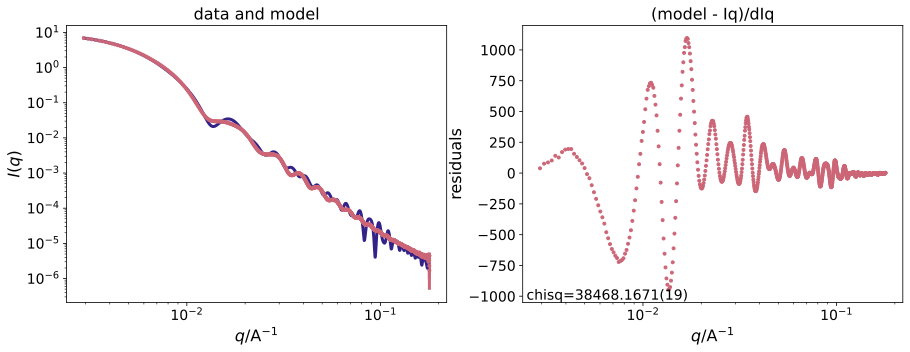

In [36]:
results = bumps.fitters.fit(problem, method='lm', steps=1000, ftol=1.5e-08, xtol=1.5e-08, verbose=True)

plt.figure(figsize=(15,5))
problem.plot()

DREAM takes more time than LM !!!

The DREAM is a Markov chain monte carlo fitting algorithm that is less likely to get trapped in local minima as LM occasionally does, but it is more computationally expensive than LM.

The samples, burn-in steps, population, initializer, thinning, and steps can be set with `burn`, `pop`, `init`, `thin` and `steps` arguments.

<img src="https://bumps.readthedocs.io/en/latest/_images/fit-dream.png">

*Image source: https://bumps.readthedocs.io/en/latest/guide/optimizer.html*

# steps: 5, # draws: 100
step 1 cost 38468.1671(19)
                                  radius ....|.....    294.017 in (200,400)
                                   scale ....|..... 3.90856e-05 in (2e-05,6e-05)
step 2 cost 38468.1671(19)
step 3 cost 38468.1671(19)
step 4 cost 38468.1671(19)
step 5 cost 38468.1671(19)
step 6 cost 38468.1671(19)
step 7 cost 38468.1671(19)
step 8 cost 38468.1671(19)
step 9 cost 38468.1671(19)
step 10 cost 38468.1671(19)
step 11 cost 38468.1671(19)
step 12 cost 38468.1671(19)
step 13 cost 38468.1671(19)
step 14 cost 38468.1671(19)
step 15 cost 38468.1671(19)
step 16 cost 38468.1671(19)
step 17 cost 38468.1671(19)
                                  radius ....|.....    294.017 in (200,400)
                                   scale ....|..... 3.90856e-05 in (2e-05,6e-05)
step 18 cost 38468.1671(19)
step 19 cost 38468.1671(19)
step 20 cost 38468.1671(19)
step 21 cost 38468.1671(19)
step 22 cost 38468.1671(19)
step 23 cost 38468.1671(19)
step 24 cost 38468.1671(19

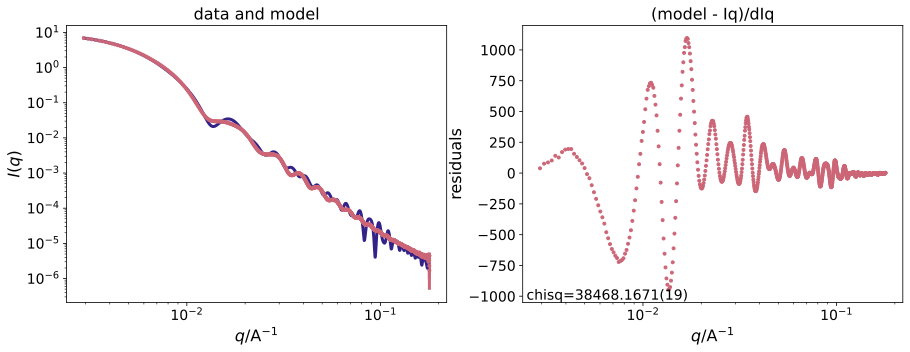

In [37]:
results = bumps.fitters.fit(problem, method='dream', steps=5, verbose=True)

plt.figure(figsize=(15,5))
problem.plot()

              Parameter       mean  median    best [   68% interval] [   95% interval]
 1               radius 294.0178(16) 294.01751 294.01720 [294.0167 294.0192] [294.0150 294.0221]
 2                scale 39.08557(31)e-6 0.00003908557 0.00003908563 [0.0000390853 0.0000390859] [0.0000390850 0.0000390862]

Statistics and plots based on 220 samples (100.0% of total samples drawn)


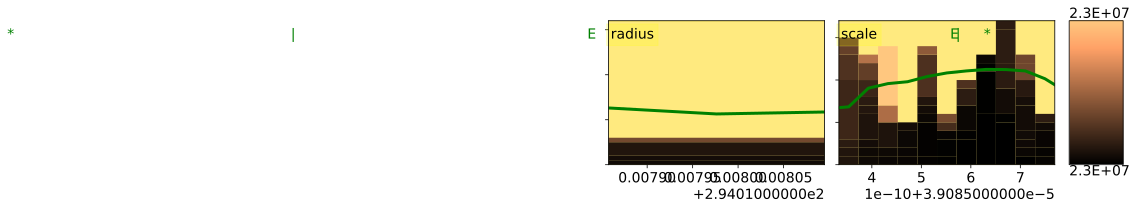

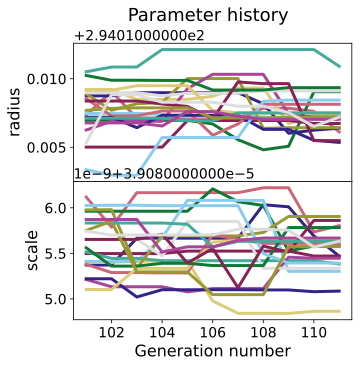

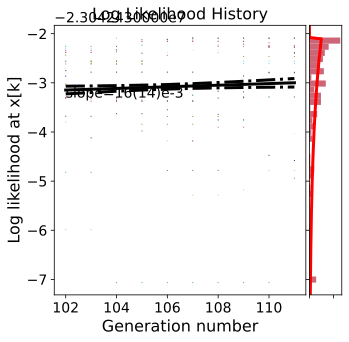

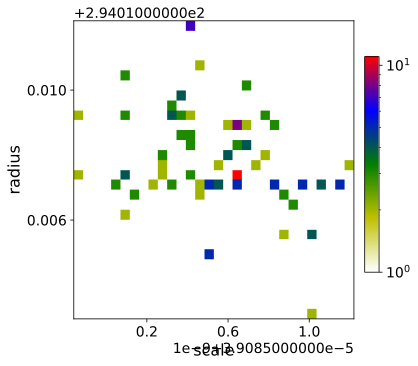

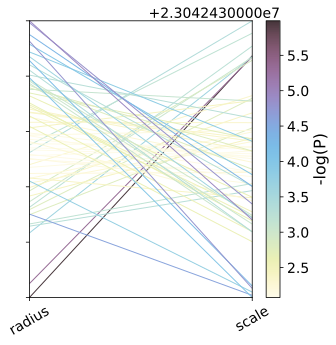

In [38]:
results.state.show(figfile='save_dream_results')